# DIFFI Methods Tests

In this notebook I will do some tests of the methods and produce some plots.

In [1]:
import os
import numpy as np
import pickle as pkl 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import IsolationForest
from pyod.models.iforest import IForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import shap
import interpretability_module as interp
from utils import *
from plot import *
import scipy.io
sns.set()

C:\Users\lemeda98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\lemeda98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See ht

## Glass Dataset

In [3]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'glass.pkl'), 'rb') as f:
    data = pkl.load(f)
# training data (inliers and outliers)
X_tr = np.concatenate((data['X_in'], data['X_out_5'], data['X_out_6']))
y_tr = np.concatenate((data['y_in'], data['y_out_5'], data['y_out_6']))
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)
# test outliers
X_te = data['X_out_7'] 
y_te = data['y_out_7']

## Lympho Dataset

In [3]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'lympho.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Ionosphere Dataset

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'ionosphere.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Letter Dataset

In [16]:
path = os.path.join(os.getcwd(), 'data', 'ufs', 'letter.mat')
data = scipy.io.loadmat(path)
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

## Synthetic Datasets - Xaxis

In [21]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_train.pkl'), 'rb') as f:
    data = pkl.load(f)
data.keys()
X_tr=data['X']
y_tr=data['y']
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

In [25]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_test.pkl'), 'rb') as f:
    data = pkl.load(f)
data.keys()
X_te=data['X_xaxis']
y_te=np.ones(X_te.shape[0])
X_te, y_te = shuffle(X_te, y_te, random_state=0)

### Train the IsolationForest Model

sklearn model

In [7]:
iforest_sklearn = IsolationForest(n_estimators= 100, max_samples=64, contamination=0.1, random_state=0, bootstrap=False)
iforest_sklearn.fit(X_tr)
y_tr_pred = np.array(iforest_sklearn.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))


F1 score (on training data): 0.39


PyOD Model

In [ ]:
iforest_pyod = IForest(n_estimators= 100, max_samples=64, contamination=0.1, random_state=0, bootstrap=False)
iforest_pyod.fit(X_tr)
y_tr_pred = np.array(iforest_pyod.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))

## Plot Functions

Create the imp_scores and plt_data folders that will contain the data generated by the compute_local_importances and compute_global_importances methods

In [4]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
if not os.path.exists(imp_scores_path):
    os.makedirs(imp_scores_path)
if not os.path.exists(plt_data_path):
    os.makedirs(plt_data_path)

Create the tests folder that will contain the unit tests 

In [2]:
tests_path=os.path.join(os.getcwd(),'tests')
if not os.path.exists(tests_path):
    os.makedirs(tests_path)

## LFI

### compute_local_importances

#### Glass

In [9]:
name='glass'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_te,name,imp_scores_path,plt_data_path)

#### Lympho

In [15]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='lympho'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_tr,name,imp_scores_path,plt_data_path)

#### Ionosphere

In [4]:
imp_scores_path=os.path.join(os.getcwd(),'imp_scores')
plt_data_path=os.path.join(os.getcwd(),'plt_data')
name='ionosphere'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_tr,name,imp_scores_path,plt_data_path)

#### Xaxis

In [32]:
name='Xaxis'
dim=X_tr.shape[1]
imps,plt_data=compute_local_importances(iforest_sklearn,X_te,name,imp_scores_path,plt_data_path)

### plt_importances_bars

#### Glass

,0,1,2,3,4,5,6,7,8
0,3.448276,3.448276,0.000000,0.000000,0.000000,3.448276,0.000000,89.655172,0.000000
1,0.000000,48.275862,3.448276,27.586207,6.896552,6.896552,6.896552,0.000000,0.000000
2,0.000000,17.241379,6.896552,37.931034,6.896552,13.793103,17.241379,0.000000,0.000000
3,6.896552,10.344828,20.689655,3.448276,24.137931,3.448276,27.586207,3.448276,0.000000
4,6.896552,10.344828,13.793103,3.448276,24.137931,13.793103,27.586207,0.000000,0.000000
5,20.689655,0.000000,20.689655,0.000000,24.137931,17.241379,6.896552,0.000000,10.344828
6,20.689655,3.448276,24.137931,3.448276,10.344828,17.241379,10.344828,0.000000,10.344828
7,17.241379,0.000000,10.344828,10.344828,3.448276,10.344828,3.448276,6.896552,37.931034
8,24.137931,6.896552,0.000000,13.793103,0.000000,13.793103,0.000000,0.000000,41.379310


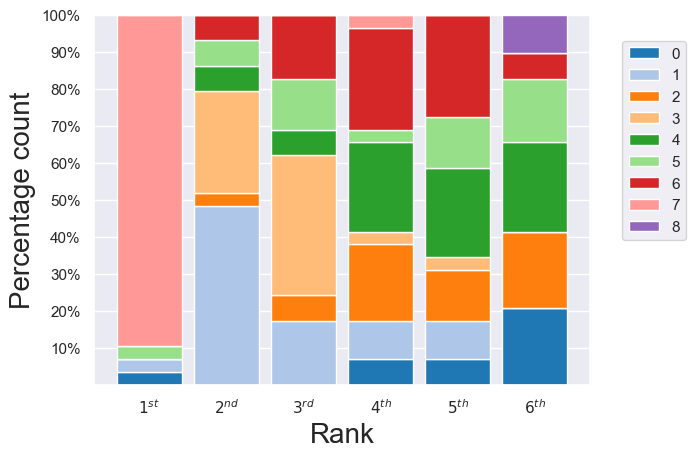

In [10]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Lympho

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.378378,2.027027,6.081081,2.027027,4.054054,4.729730,4.054054,5.405405,4.729730,4.729730,2.027027,6.081081,9.459459,4.729730,4.729730,8.783784,12.162162,10.810811
1,6.756757,12.162162,2.027027,2.027027,6.756757,1.351351,2.702703,6.081081,0.675676,10.135135,4.054054,4.729730,12.837838,2.027027,7.432432,8.108108,4.729730,5.405405
2,6.756757,6.081081,0.675676,1.351351,0.675676,11.486486,0.000000,8.783784,2.027027,4.729730,12.162162,8.108108,6.756757,6.081081,6.756757,6.756757,5.405405,5.405405
3,7.432432,10.135135,2.702703,2.702703,2.702703,6.756757,0.675676,4.729730,1.351351,2.702703,8.108108,10.135135,7.432432,8.783784,9.459459,8.108108,2.027027,4.054054
4,10.810811,10.135135,2.027027,1.351351,3.378378,10.135135,0.000000,4.729730,0.675676,5.405405,6.081081,6.756757,4.729730,8.783784,8.783784,5.405405,5.405405,5.405405
5,9.459459,10.810811,0.675676,0.000000,6.081081,10.810811,2.027027,6.081081,2.702703,5.405405,6.081081,5.405405,6.081081,10.135135,5.405405,5.405405,4.054054,3.378378
6,5.405405,9.459459,2.702703,2.702703,0.675676,5.405405,4.729730,3.378378,6.756757,4.054054,4.729730,8.108108,4.054054,7.432432,4.729730,11.486486,6.756757,7.432432
7,8.108108,8.783784,5.405405,1.351351,3.378378,4.054054,2.027027,6.756757,5.405405,3.378378,5.405405,8.108108,9.459459,4.729730,6.756757,8.108108,4.729730,4.054054
8,8.108108,8.783784,8.783784,2.027027,6.081081,2.027027,3.378378,4.054054,4.054054,6.081081,7.432432,7.432432,5.405405,10.135135,4.054054,6.756757,2.702703,2.702703
9,6.081081,4.729730,6.756757,4.729730,5.405405,6.081081,1.351351,3.378378,3.378378,6.756757,8.783784,7.432432,5.405405,8.783784,4.729730,4.054054,4.729730,7.432432


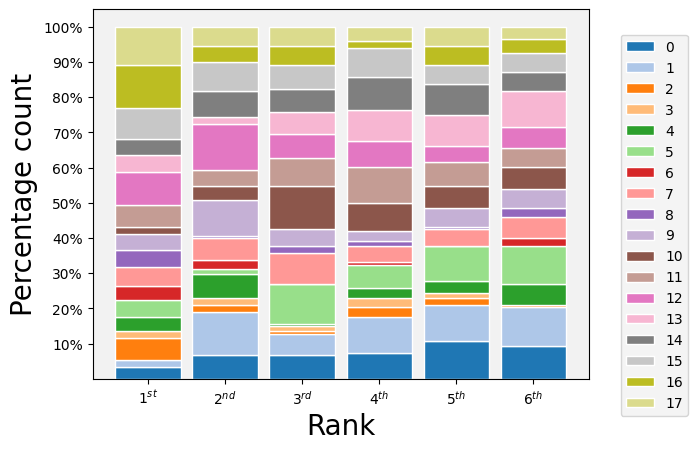

In [16]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Ionosphere

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,8.262108,1.424501,2.279202,2.564103,1.994302,5.698006,5.413105,9.116809,3.418803,2.279202,...,2.564103,3.133903,5.982906,0.569801,0.854701,1.424501,0.854701,2.279202,0.569801,2.564103
1,3.133903,1.709402,2.279202,2.849003,1.994302,6.267806,5.128205,5.698006,3.703704,3.133903,...,5.698006,2.279202,3.418803,1.139601,2.279202,2.849003,0.854701,4.843305,1.994302,1.994302
2,2.279202,3.133903,1.139601,0.854701,1.994302,3.418803,3.703704,4.843305,4.558405,3.988604,...,2.849003,3.418803,2.849003,0.854701,2.849003,1.994302,1.424501,2.564103,6.552707,4.558405
3,1.139601,3.418803,2.564103,1.424501,3.418803,2.849003,4.843305,8.262108,5.698006,3.418803,...,0.854701,3.133903,4.558405,2.279202,2.564103,1.709402,0.854701,5.128205,3.418803,2.849003
4,2.564103,2.849003,1.994302,2.279202,0.569801,3.418803,5.128205,3.418803,1.709402,3.133903,...,4.273504,3.133903,4.843305,2.279202,2.279202,2.564103,4.558405,3.988604,3.133903,5.982906
5,1.709402,3.988604,3.418803,2.564103,5.413105,1.709402,1.424501,3.703704,3.988604,1.139601,...,1.709402,3.988604,3.703704,3.703704,2.564103,8.831909,1.709402,4.558405,5.982906,1.994302
6,0.854701,2.564103,1.994302,1.709402,3.133903,2.564103,2.279202,2.564103,3.418803,4.843305,...,3.988604,3.418803,3.133903,2.279202,6.837607,1.994302,3.133903,4.273504,3.133903,2.279202
7,1.709402,2.564103,2.849003,1.424501,3.703704,3.418803,1.994302,2.849003,2.564103,0.854701,...,3.703704,5.128205,3.988604,6.552707,4.843305,2.279202,2.279202,4.273504,4.843305,3.418803
8,3.703704,3.703704,2.849003,2.564103,2.279202,3.133903,2.564103,2.849003,2.849003,3.133903,...,1.994302,6.552707,5.698006,2.279202,2.279202,1.139601,1.139601,3.133903,1.709402,2.564103
9,1.709402,5.128205,2.564103,1.139601,1.709402,2.564103,2.564103,4.273504,2.279202,5.413105,...,3.988604,6.837607,3.418803,4.273504,2.849003,2.279202,2.849003,4.558405,2.849003,3.703704


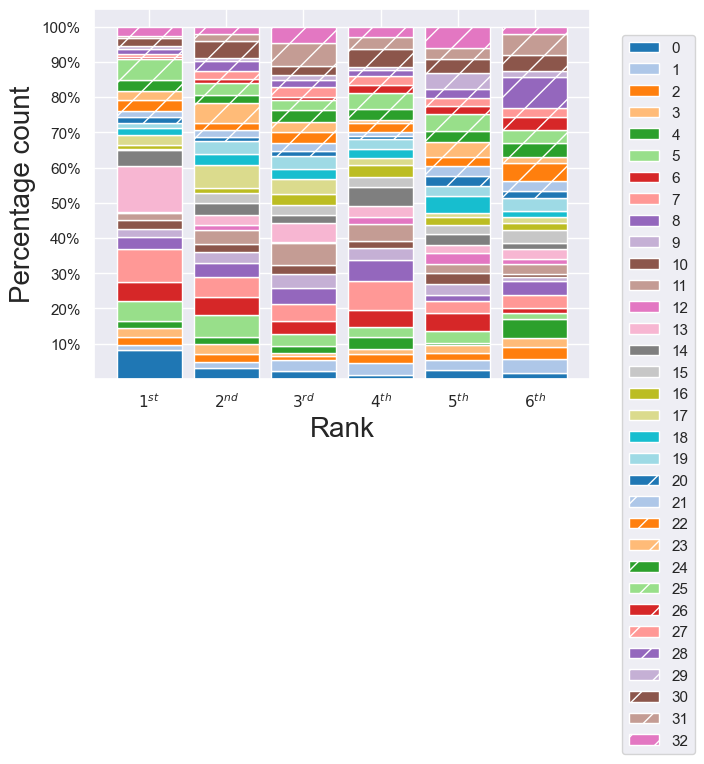

In [5]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

#### Xaxis

,0,1,2,3,4,5
0,100.0,0.0,0.0,0.0,0.0,0.0
1,0.0,40.0,42.0,1.0,14.0,3.0
2,0.0,9.0,37.0,12.0,31.0,11.0
3,0.0,12.0,10.0,22.0,9.0,47.0
4,0.0,21.0,10.0,30.0,11.0,28.0
5,0.0,18.0,1.0,35.0,35.0,11.0


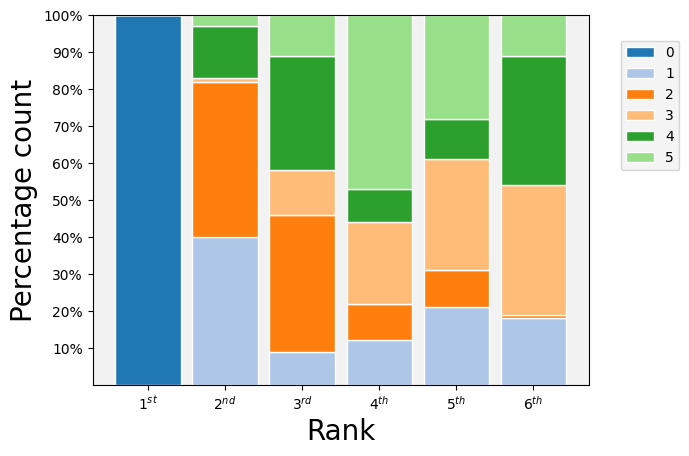

In [33]:
path=os.path.join(os.getcwd(),'images')
dim=X_tr.shape[1]
plt_importances_bars(imps,name,dim=dim,pwd=path)

### plt_feat_bar_plot

#### Glass

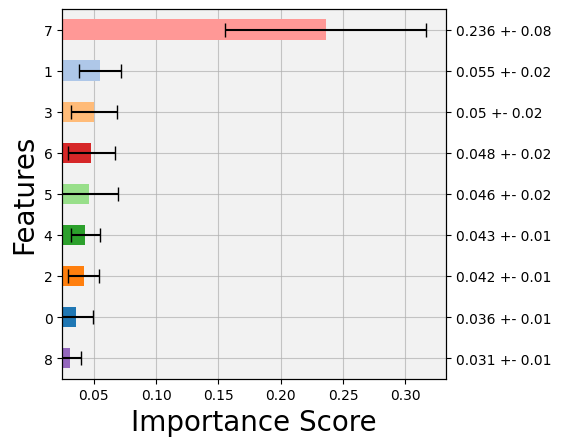

In [11]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Lympho

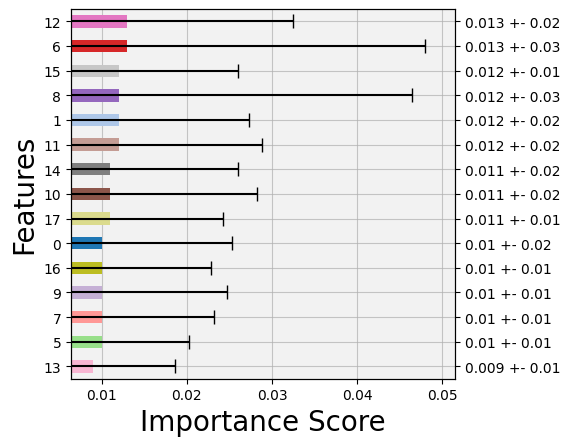

In [17]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Ionosphere

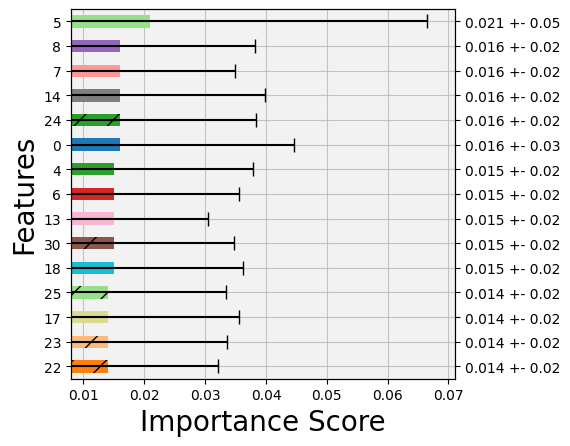

In [14]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

#### Xaxis

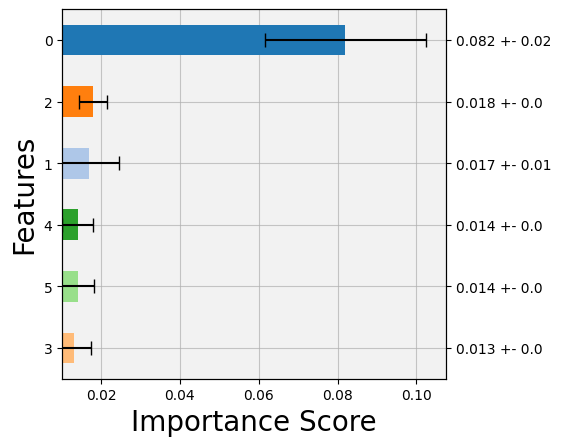

In [34]:
plt_feat_bar_plot(plt_data,name,pwd=path,save=True)

### plt_importance_map

#### Glass

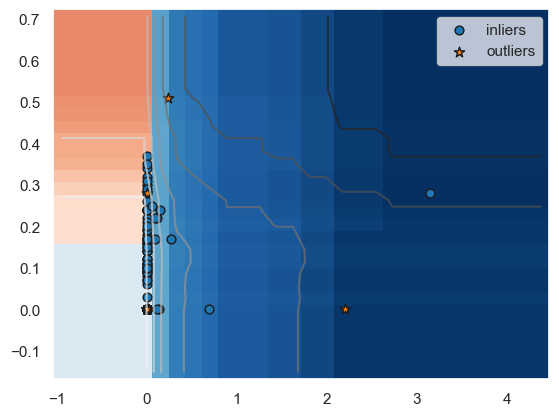

In [7]:
name='glass'
path=os.path.join(os.getcwd(),'images')
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(7,8))

#### Lympho

Handling the IndexError Exception...


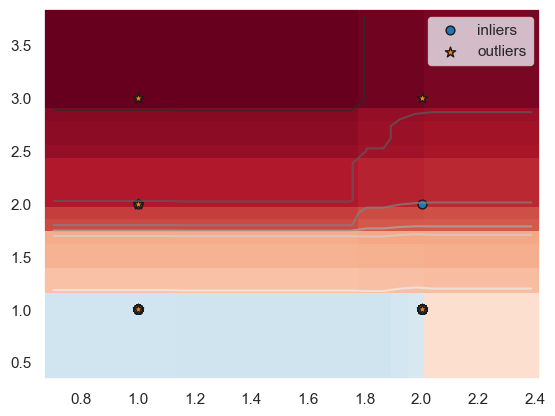

In [5]:
name='lympho'
path=os.path.join(os.getcwd(),'images')
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(7,8))

#### Ionosphere

Handling the IndexError Exception...


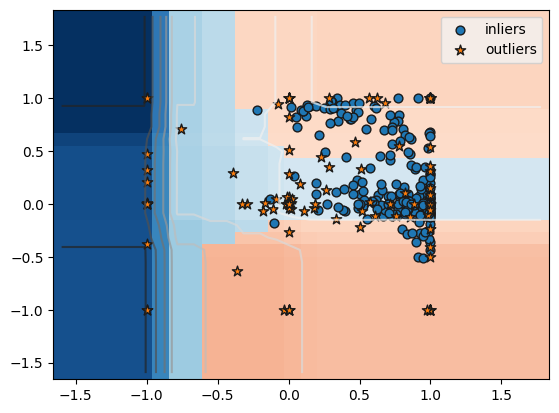

In [15]:
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(5,8))

#### Xaxis

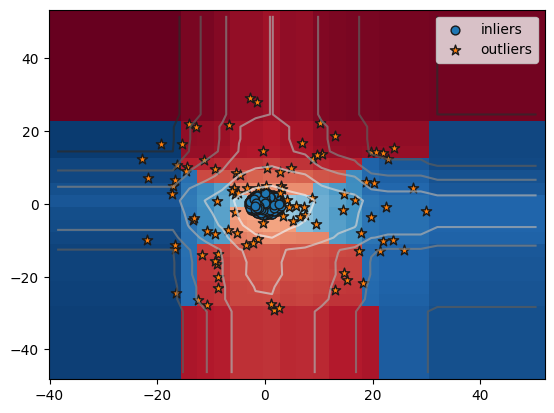

In [35]:
plot_importance_map(name,iforest_sklearn,X_tr,y_tr,30,pwd=path,save=True,feats_plot=(0,1))

### plt_complete_scoremap

This method takes a lot of time in particular with the datasets with a lot of features (like the ones contained in the folder data).

In [ ]:
plot_complete_scoremap(name,X_te.shape[1],iforest_sklearn,X_te,y_te)

## GFI

### compute_global_importances

#### Glass

In [6]:
name='glass'
pwd_imp_scores=os.path.join(os.getcwd(),'imp_scores')
pwd_plt_data=os.path.join(os.getcwd(),'plt_data')
iforest = IsolationForest(n_estimators= 100, max_samples=64, contamination=0.1, bootstrap=False)
global_imps,plt_data=compute_global_importances(iforest,X_tr,10,name,pwd_imp_scores,pwd_plt_data)

#### Lympho

In [ ]:
pwd_imp_scores=os.path.join(os.getcwd(),'imp_scores')
pwd_plt_data=os.path.join(os.getcwd(),'plt_data')
iforest = IsolationForest(n_estimators= 100, max_samples=64, contamination=0.1, bootstrap=False)
global_imps,plt_data=compute_global_importances(iforest,X_tr,10,name,pwd_imp_scores,pwd_plt_data)

### plt_importances_bars

#### Glass

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,20.0,10.0,0.0,0.0,50.0,0.0,20.0,0.0,0.0
2,10.0,60.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0
3,30.0,20.0,0.0,10.0,10.0,10.0,20.0,0.0,0.0
4,20.0,0.0,0.0,30.0,10.0,20.0,20.0,0.0,0.0
5,0.0,0.0,0.0,10.0,20.0,40.0,20.0,0.0,10.0
6,20.0,10.0,0.0,40.0,0.0,20.0,10.0,0.0,0.0
7,0.0,0.0,50.0,0.0,10.0,0.0,0.0,0.0,40.0
8,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,50.0


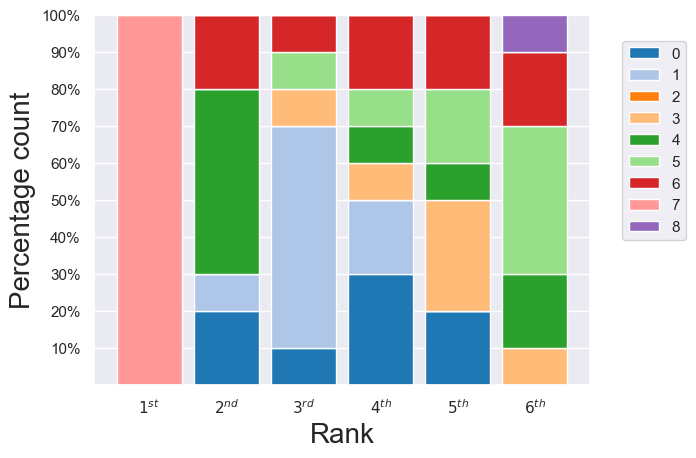

In [9]:
dim=X_tr.shape[1]
plt_importances_bars(global_imps,name,dim=dim,is_local=False)

#### Lympho

In [ ]:
dim=X_tr.shape[1]
plt_importances_bars(global_imps,name,dim=dim,is_local=False)

### plt_feat_bar_plot

#### Glass

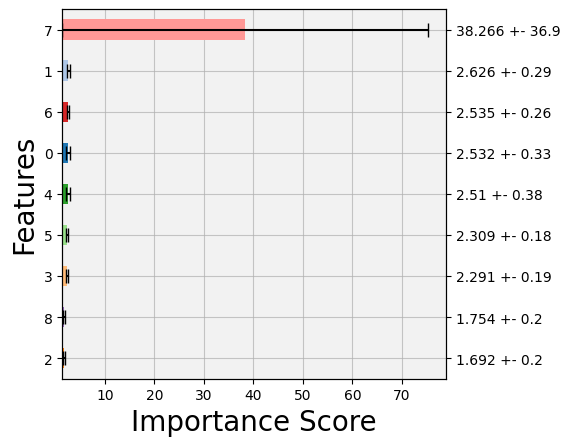

In [10]:
path=os.path.join(os.getcwd(),'images')
plt_feat_bar_plot(plt_data,name,pwd=path,is_local=False,save=True)

#### Lympho

In [ ]:
path=os.path.join(os.getcwd(),'images')
plt_feat_bar_plot(plt_data,name,pwd=path,is_local=False,save=True)

## Code to understand what to do in the pytest

In [10]:
# start time
start = time.time()
# initialization
num_feat = X_tr.shape[1] 
estimators = iforest_sklearn.estimators_
cfi_outliers_ib = np.zeros(num_feat).astype('float')
cfi_inliers_ib = np.zeros(num_feat).astype('float')
counter_outliers_ib = np.zeros(num_feat).astype('int')
counter_inliers_ib = np.zeros(num_feat).astype('int')
in_bag_samples = iforest_sklearn.estimators_samples_

In [16]:
# for every iTree in the _sklearn
for k, estimator in enumerate(estimators):
    # get in-bag samples indices
    in_bag_sample = list(in_bag_samples[k])
    # get in-bag samples (predicted inliers and predicted outliers)
    X_ib = X_tr[in_bag_sample,:]
    as_ib = decision_function_single_tree(iforest_sklearn, k, X_ib)
    X_outliers_ib = X_ib[np.where(as_ib < 0)]
    X_inliers_ib = X_ib[np.where(as_ib > 0)]
    if X_inliers_ib.shape[0] == 0 or X_outliers_ib.shape[0] == 0:
        continue
    # compute relevant quantities
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    # compute node depths
    stack = [(0, -1)]  
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
        # if we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

In [26]:
from interpretability_module import _get_iic
lambda_outliers_ib = _get_iic(estimator, X_outliers_ib, is_leaves, adjust_iic=True)

In [27]:
lambda_outliers_ib

array([ 1.        ,  0.5       ,  1.        ,  0.66666667,  0.5       ,
       -1.        , -1.        , -1.        , -1.        ,  0.5       ,
        0.66666667, -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        ,  0.5       ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        ])

In [33]:
estimators

[ExtraTreeRegressor(max_depth=6, max_features=1, random_state=2087557356),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=132990059),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1109697837),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=123230084),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=633163265),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=998640145),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1452413565),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=2006313316),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=45050103),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=395371042),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=1587149235),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=191269509),
 ExtraTreeRegressor(max_depth=6, max_features=1, random_state=237186348),
 ExtraTreeRegressor(max_depth=6, m

In [31]:
lambda_outliers_ib.shape, X_outliers_ib.shape

((29,), (10, 9))

In [46]:
np.random.seed(0)
X = np.random.randn(100, 10)
# create an isolation forest model
iforest = IsolationForest(n_estimators=10, random_state=0)
iforest.fit(X)
is_leaves=np.random.choice([True, False], size=X.shape[0])
#adjust_iic=np.random.choice([True, False], size=1)
lambda_outliers_ib_false = _get_iic(iforest.estimators_[1], X, is_leaves, adjust_iic=False)
lambda_outliers_ib_true = _get_iic(iforest.estimators_[1], X, is_leaves, adjust_iic=True)
lambda_outliers_ib_false

array([-1.        , -1.        ,  0.66666667,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        ,  0.83333333, -1.        ,
        0.8       , -1.        ,  0.5       ,  0.5       , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        ,  0.85714286,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        , -1.        ,
       -1.        ,  0.75      , -1.        ,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  0.98734177,
       -1.        ,  0.94871795,  0.60810811, -1.        ,  0.2       ,
       -1.        ,  0.75555556, -1.        ,  0.09090909,  0.75      ,
        0.66666667,  0.5       , -1.        , -1.        , -1.        ])

In [47]:
lambda_outliers_ib_true

array([-1.        , -1.        ,  0.66666667,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        ,  1.        , -1.        ,
        1.        , -1.        ,  0.5       ,  0.5       , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        ,  1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.5       , -1.        , -1.        , -1.        ,
       -1.        ,  1.        , -1.        ,  0.66666667, -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  1.        ,
       -1.        ,  0.96052632,  0.61111111, -1.        , -0.5       ,
       -1.        ,  0.76190476, -1.        , -0.125     ,  1.        ,
        0.66666667,  0.5       , -1.        , -1.        , -1.        ])

In [51]:
lambda_outliers_ib_false >= 0.7

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False])